In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

df = pd.read_csv("purchase_history.csv")
df.head()

,user_id,product_id,created_at
0,647746,2011564,2019-02-09
1,906136,4105782,2019-11-23
2,12862997,2144063,2019-07-16
3,12097079,1207738,2019-04-05
4,3184486,4278839,2019-03-08


In [2]:
len(df)

2174447

In [3]:
# show example of data with user_id
df[df['user_id']==12862997]

,user_id,product_id,created_at
2,12862997,2144063,2019-07-16
969122,12862997,2144063,2019-11-02
1631287,12862997,2144063,2019-05-21
1890577,12862997,2144063,2019-11-05
1978805,12862997,2144063,2019-09-07


In [4]:
def TokenizingDateTimes():
    date_to_token = {}
    token_to_date = {}
    tknz = 1
    for year in range(2019, 2021): # years create
        for month in range(1, 13): # month create
            for day in range(1, 32): # days create
                if day<10 and month<10:
                    date_to_token[f"{year}-0{month}-0{day}"] = tknz
                    token_to_date[tknz] = f"{year}-0{month}-0{day}"
                    tknz += 1
                elif day<10 and month>=10:
                    date_to_token[f"{year}-{month}-0{day}"] = tknz
                    token_to_date[tknz] = f"{year}-{month}-0{day}"
                    tknz += 1
                elif day>=10 and month<10:
                    date_to_token[f"{year}-0{month}-{day}"] = tknz
                    token_to_date[tknz] = f"{year}-0{month}-{day}"
                    tknz += 1
                else:
                    date_to_token[f"{year}-{month}-{day}"] = tknz
                    token_to_date[tknz] = f"{year}-{month}-{day}"
                    tknz += 1
                    
    return date_to_token, token_to_date        
            
        
tokens_value, tokens_key = TokenizingDateTimes()   

In [4]:
#show example
tokens_value['2019-01-20'], tokens_key[20]

(20, '2019-01-20')

In [5]:
df['created_at'] = df['created_at'].map(tokens_value)
df.sort_values(by='created_at', inplace=True) # sort values to visulization better
df.head()

,user_id,product_id,created_at
860746,8672008,3890806,2
1516796,750857,2198311,2
782386,6601315,987662,2
2018022,1060650,3356497,2
318411,1220553,898824,2


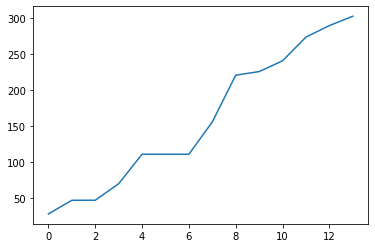

In [6]:
# show example of data with user_id and product_id
example = df[df['user_id']==3184486]
example = example[example['product_id']==4278839]['created_at']
indexes = [i for i in range(len(example))]
plt.plot(indexes, example)
plt.show()

In [7]:
# we must split any user_id and product_id
data_dict = {}
for name, value in df.groupby(by=['user_id', 'product_id']):
    data_dict[name] = sorted(list(set(value['created_at'].values)))

In [8]:
# show examples
data_dict[(577243, 968036)], data_dict[(577243, 968153)]

([26, 31, 33, 41, 283, 289, 296, 308], [3, 26, 136, 148])

In [9]:
# values must be the same length
def MinimomLength(ln):
    return min([len(i) for i in ln])

chunke = MinimomLength(data_dict.values())
chunke

4

In [10]:
x_train = []
y_train = []
for val in data_dict.values():
    x_train.append(val[-chunke:-1])
    y_train.append(val[-1])
    
x_train, y_train = np.array(x_train), np.array(y_train)
x_train.shape, y_train.shape

((318050, 3), (318050,))

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# for Linear Regression
model = LinearRegression(n_jobs=10)
model.fit(x_train, y_train)
model.score(x_train, y_train)

0.8018710245072824

In [52]:
# for Random Forest Regressor
model = RandomForestRegressor(n_jobs=10, n_estimators=100,)
model.fit(x_train, y_train)
model.score(x_train, y_train)

0.9501507033210249

In [12]:
# for Decision Tree Regressor
model = DecisionTreeRegressor()
model.fit(x_train, y_train)
model.score(x_train, y_train)

0.9737711299520847

In [54]:
# for K Neighbors Regressor
model = KNeighborsRegressor(n_jobs=10, n_neighbors=4)
model.fit(x_train, y_train)
model.score(x_train, y_train)

0.859380845219555

In [13]:
data_dict[(577243, 875550)] # target is 171

[19, 44, 106, 171]

In [14]:
# example predictions
x_test = np.array([19, 44, 106]) 
pred = model.predict(x_test.reshape(1, -1))
pred

array([171.])

In [15]:
tokens_key[int(pred)]

'2019-06-16'

In [16]:
# predict future
x_future = np.array([44, 106, 171]) 
forcast = model.predict(x_future.reshape(1, -1))
forcast

array([229.])

In [17]:
tokens_key[int(forcast)]

'2019-08-12'